In [7]:
from netflix_data_reader import NetflixReader

reader = NetflixReader()
reader.read_netflix_data(file_path="./data/netflix_data.csv")
reader.preprocess()

### imdb_score and imdb_votes mean and standard deviation

In [17]:
print(f"IMDB Score (mean): {reader.netflix_data['imdb_score'].mean()}")
print(f"IMDB Score (std): {reader.netflix_data['imdb_score'].std()}")
print(f"IMDB Votes (mean): {reader.netflix_data['imdb_votes'].mean()}")
print(f"IMDB Votes (std): {reader.netflix_data['imdb_votes'].std()}")

IMDB Score (mean): 6.533307999239978
IMDB Score (std): 1.1609092155353036
IMDB Votes (mean): 23412.903097092913
IMDB Votes (std): 87166.08234862305


In [8]:
reader.netflix_data

,index,id,title,type,release_year,runtime,imdb_id,imdb_score,imdb_votes,,...,european,family,horror,western,history,reality,scifi,crime,music,action
1,1,tm84618,Taxi Driver,MOVIE,1976,113,tt0075314,8.3,795222,False,...,False,False,False,False,False,False,False,True,False,False
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,tt0071853,8.2,530877,False,...,False,False,False,False,False,False,False,False,False,False
3,3,tm70993,Life of Brian,MOVIE,1979,94,tt0079470,8.0,392419,False,...,False,False,False,False,False,False,False,False,False,False
4,4,tm190788,The Exorcist,MOVIE,1973,133,tt0070047,8.1,391942,False,...,False,False,True,False,False,False,False,False,False,False
5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,30,tt0063929,8.8,72895,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,5800,tm1040816,Momshies! Your Soul is Mine,MOVIE,2021,108,tt14412240,5.8,26,False,...,False,False,False,False,False,False,False,False,False,False
5801,5801,tm1014599,Fine Wine,MOVIE,2021,100,tt13857480,6.9,39,False,...,False,False,False,False,False,False,False,False,False,False
5803,5803,tm1045018,Clash,MOVIE,2021,88,tt14620732,6.5,32,False,...,False,True,False,False,False,False,False,False,False,False
5804,5804,tm1098060,Shadow Parties,MOVIE,2021,116,tt10168094,6.2,9,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
import matplotlib.pyplot as plt

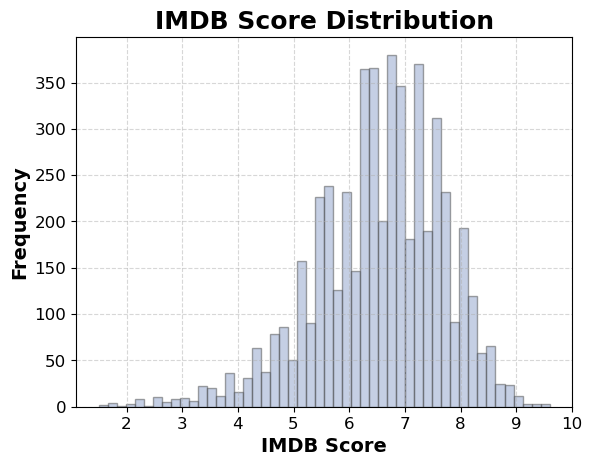

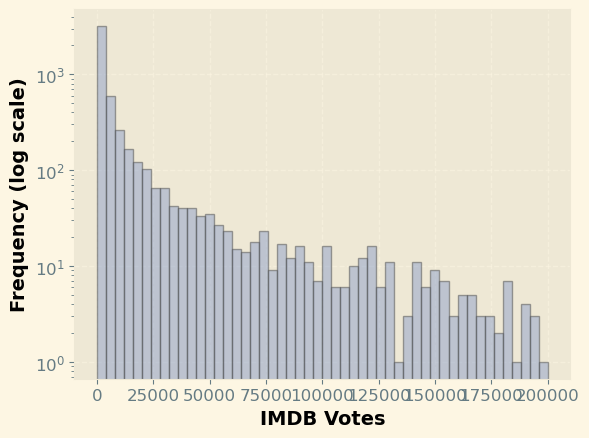

In [10]:
# create histogram of imdb_score
plt.hist(reader.netflix_data['imdb_score'], bins=50, alpha=0.5, color='#8da0cb', edgecolor='#4a4a4a')
plt.title('IMDB Score Distribution', fontsize=18, fontweight='bold')
plt.xlabel('IMDB Score', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.style.use('Solarize_Light2')
plt.show()

# create histogram of imdb_votes
plt.hist(reader.netflix_data['imdb_votes'], bins=50, range=(0,200000), log=True, alpha=0.5, color='#8da0cb', edgecolor='#4a4a4a')
plt.xlabel('IMDB Votes', fontsize=14, fontweight='bold')
plt.ylabel('Frequency (log scale)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.style.use('Solarize_Light2')
plt.show()


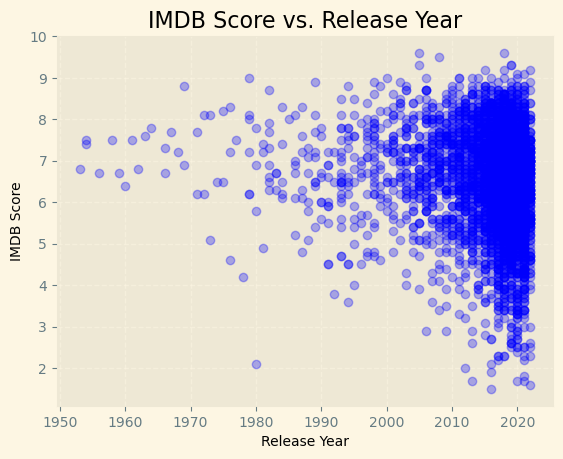

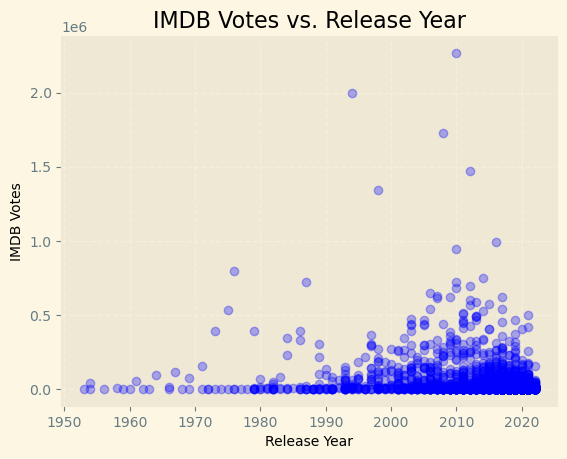

In [11]:
# Scatter-Plot von imdb_score und release_year
plt.scatter(reader.netflix_data['release_year'], reader.netflix_data['imdb_score'], alpha=0.3, color='b')
plt.title('IMDB Score vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('IMDB Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Scatter-Plot von imdb_votes und release_year
plt.scatter(reader.netflix_data['release_year'], reader.netflix_data['imdb_votes'], alpha=0.3, color='b')
plt.title('IMDB Votes vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('IMDB Votes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


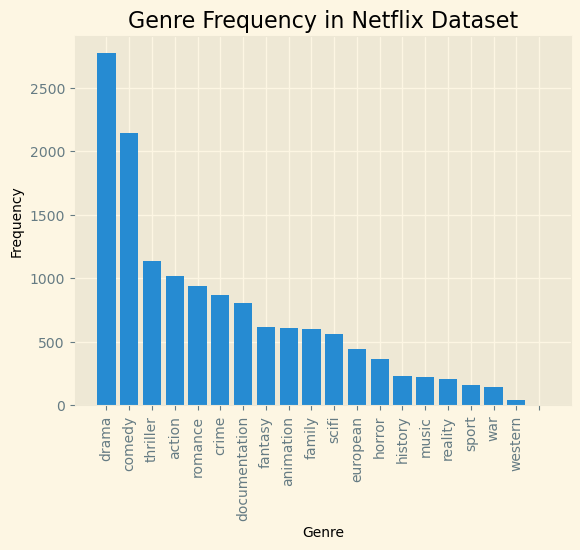

In [12]:
# Load data from the dataframe
df = reader.netflix_data

# Get the frequency of occurrence of each genre
genre_freq = df.iloc[:, -20:].sum().sort_values(ascending=False)

# Create a bar chart of the genre frequency
plt.bar(genre_freq.index, genre_freq.values)

# Set the axis labels and title
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre Frequency in Netflix Dataset')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Box-Plot IMDB Score for genres